# COMP5318 Assignment 1: Rice Classification

##### Group number: 9
##### Student 1 SID: 550831275
##### Student 2 SID: 550337755 
##### Student 3 SID: 550137096
##### Student 4 SID: 540247804

In [36]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [37]:
# Ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [38]:
# Load the rice dataset: rice-final2.csv
import csv

with open("rice-final2.csv", "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    data = list(reader)
    headers = data[0]
    rows = data[1:]
    

In [39]:
# Pre-process dataset
# Convert to pandas DataFrame
df = pd.DataFrame(rows, columns=headers)

# Separate features and class
feature_columns = headers[:-1]  # All columns except the last one
class_column = headers[-1]      # Last column is the class

# Convert feature columns to numeric, replacing '?' with NaN
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Fill missing values using SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')
df[feature_columns] = imputer.fit_transform(df[feature_columns])

#Normalize features using MinMaxScaler [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Step 3: Convert class labels (class1 -> 0, class2 -> 1)
df[class_column] = df[class_column].map({'class1': 0, 'class2': 1})

# Convert to numpy arrays for the print function
X = df[feature_columns].values
y = df[class_column].values    

df.to_csv("pre_processed_rice-final2.csv", index=False)
print(df)

          Area  Perimiter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     0.462769   0.540629           0.511308           0.480281      0.738024   
1     0.489955   0.554651           0.526644           0.501827      0.731928   
2     0.610895   0.684720           0.670676           0.540878      0.803189   
3     0.646577   0.693038           0.667718           0.596066      0.760059   
4     0.671164   0.623288           0.475495           0.829297      0.372052   
...        ...        ...                ...                ...           ...   
1395  0.722139   0.770442           0.725138           0.639741      0.766447   
1396  0.649375   0.734206           0.697742           0.580198      0.792031   
1397  0.699750   0.808240           0.881735           0.472929      0.961670   
1398  0.288356   0.299721           0.237111           0.458070      0.496796   
1399  0.738931   0.790537           0.794219           0.597253      0.839383   

      Convex_Area    Extent

In [40]:
# Print first ten rows of pre-processed dataset to 4 decimal places as per assignment spec
# A function is provided to assist

def print_data(X, y, n_rows=10):
    """Takes a numpy data array and target and prints the first ten rows.
    
    Arguments:
        X: numpy array of shape (n_examples, n_features)
        y: numpy array of shape (n_examples)
        n_rows: numpy of rows to print
    """
    for example_num in range(n_rows):
        for feature in X[example_num]:
            print("{:.4f}".format(feature), end=",")

        if example_num == len(X)-1:
            print(y[example_num],end="")
        else:
            print(y[example_num])
            
print_data(X, y)

0.4628,0.5406,0.5113,0.4803,0.7380,0.4699,0.1196,1
0.4900,0.5547,0.5266,0.5018,0.7319,0.4926,0.8030,1
0.6109,0.6847,0.6707,0.5409,0.8032,0.6253,0.1185,0
0.6466,0.6930,0.6677,0.5961,0.7601,0.6467,0.2669,0
0.6712,0.6233,0.4755,0.8293,0.3721,0.6803,0.4211,1
0.2634,0.2932,0.2414,0.4127,0.5521,0.2752,0.2825,1
0.8175,0.9501,0.9515,0.5925,0.9245,0.8162,0.0000,0
0.3174,0.3588,0.3601,0.3908,0.6921,0.3261,0.8510,1
0.3130,0.3050,0.2150,0.5189,0.3974,0.3159,0.4570,1
0.5120,0.5237,0.4409,0.6235,0.5460,0.5111,0.3155,1


### Part 1: Cross-validation without parameter tuning

In [41]:
# Set up 10-fold stratified cross-validation
cvKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Parameters for classifiers
bag_n_estimators = 50
bag_max_samples = 100
bag_max_depth = 5

ada_n_estimators = 50
ada_learning_rate = 0.5
ada_bag_max_depth = 5

In [42]:
# Logistic Regression
def logregClassifier(X, y):

    return scores.mean()

In [43]:
#Naïve Bayes
def nbClassifier(X, y):

    return scores.mean()

In [44]:
# Decision Tree
def dtClassifier(X, y):
    dt_classifier = DecisionTreeClassifier(random_state=0)
    scores = cross_val_score(dt_classifier, X, y, cv=cvKFold, scoring='accuracy')
    return scores.mean()

In [45]:
# Ensembles: Bagging, Ada Boost and Gradient Boosting
def bagDTClassifier(X, y, n_estimators, max_samples, max_depth):
    base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    bag_classifier = BaggingClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=0
    )
    scores = cross_val_score(bag_classifier, X, y, cv=cvKFold, scoring='accuracy')
    return scores.mean()

def adaDTClassifier(X, y, n_estimators, learning_rate, max_depth):
    base_estimator_ada = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    ada_classifier = AdaBoostClassifier(
        estimator=base_estimator_ada,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=0,
        algorithm='SAMME'
    )
    scores = cross_val_score(ada_classifier, X, y, cv=cvKFold, scoring='accuracy')
    return scores.mean()

def gbClassifier(X, y, n_estimators, learning_rate):

    return scores.mean()

In [46]:
dt_scores = dtClassifier(X, y)
bag_scores = bagDTClassifier(X, y, bag_n_estimators, bag_max_samples, bag_max_depth)
ada_scores = adaDTClassifier(X, y, ada_n_estimators, ada_learning_rate, ada_bag_max_depth)
print(f'DT average cross-validation accuracy:: {dt_scores:.4f}')
print(f"Bagging average cross-validation accuracy: {bag_scores:.4f}")
print(f"AdaBoost average cross-validation accuracy: {ada_scores:.4f}")

DT average cross-validation accuracy:: 0.9057
Bagging average cross-validation accuracy: 0.9421
AdaBoost average cross-validation accuracy: 0.9307


In [47]:
# Quick performance comparison
results = {
    'Decision Tree': dt_scores,
    'Bagging': bag_scores,
    'AdaBoost': ada_scores
}

best_classifier = max(results, key=results.get)
print(f"\nBest performing classifier: {best_classifier} ({results[best_classifier]:.4f})")


Best performing classifier: Bagging (0.9421)


In [48]:
# Generate visualizations and detailed analysis
# Initialize classifiers with same parameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Bagging': BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=bag_max_depth, random_state=0),
        n_estimators=bag_n_estimators,
        max_samples=bag_max_samples,
        random_state=0
    ),
    'AdaBoost': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=ada_bag_max_depth, random_state=0),
        n_estimators=ada_n_estimators,
        learning_rate=ada_learning_rate,
        random_state=0,
        algorithm='SAMME'
    )
}

In [49]:
# Collect detailed performance metrics
all_results = []
for name, clf in classifiers.items():
    # Collect cross-validation scores for each fold
    cv_accuracies = []
    cv_precisions = []
    cv_recalls = []
    cv_f1_scores = []
    all_y_true = []
    all_y_pred = []

    # Perform stratified k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(cvKFold.split(X, y)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        # Train classifier on current fold
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on test set
        y_pred_fold = clf.predict(X_test_fold)

        # Store true and predicted labels for confusion matrix
        all_y_true.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

        # Calculate metrics for current fold
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        precision = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0)
        recall = recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0)
        f1 = f1_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0)

        # Store metrics
        cv_accuracies.append(accuracy)
        cv_precisions.append(precision)
        cv_recalls.append(recall)
        cv_f1_scores.append(f1)

    # Store results
    result = {
        'classifier_name': name,
        'accuracy_mean': np.mean(cv_accuracies),
        'accuracy_std': np.std(cv_accuracies),
        'precision_mean': np.mean(cv_precisions),
        'precision_std': np.std(cv_precisions),
        'recall_mean': np.mean(cv_recalls),
        'recall_std': np.std(cv_recalls),
        'f1_mean': np.mean(cv_f1_scores),
        'f1_std': np.std(cv_f1_scores),
        'cv_accuracies': cv_accuracies,
        'all_y_true': all_y_true,
        'all_y_pred': all_y_pred
    }
    all_results.append(result)

for result in all_results:
    print(f'\n{result["classifier_name"]} Classifier:')
    print('-' * 50)
    print(f'Accuracy:  {result["accuracy_mean"]:.4f} ± {result["accuracy_std"]:.4f}')
    print(f'Precision: {result["precision_mean"]:.4f} ± {result["precision_std"]:.4f}')
    print(f'Recall:    {result["recall_mean"]:.4f} ± {result["recall_std"]:.4f}')
    print(f'F1-Score:  {result["f1_mean"]:.4f} ± {result["f1_std"]:.4f}')


Decision Tree Classifier:
--------------------------------------------------
Accuracy:  0.9057 ± 0.0204
Precision: 0.9068 ± 0.0199
Recall:    0.9057 ± 0.0204
F1-Score:  0.9058 ± 0.0202

Bagging Classifier:
--------------------------------------------------
Accuracy:  0.9421 ± 0.0215
Precision: 0.9430 ± 0.0214
Recall:    0.9421 ± 0.0215
F1-Score:  0.9421 ± 0.0215

AdaBoost Classifier:
--------------------------------------------------
Accuracy:  0.9307 ± 0.0230
Precision: 0.9314 ± 0.0231
Recall:    0.9307 ± 0.0230
F1-Score:  0.9307 ± 0.0229


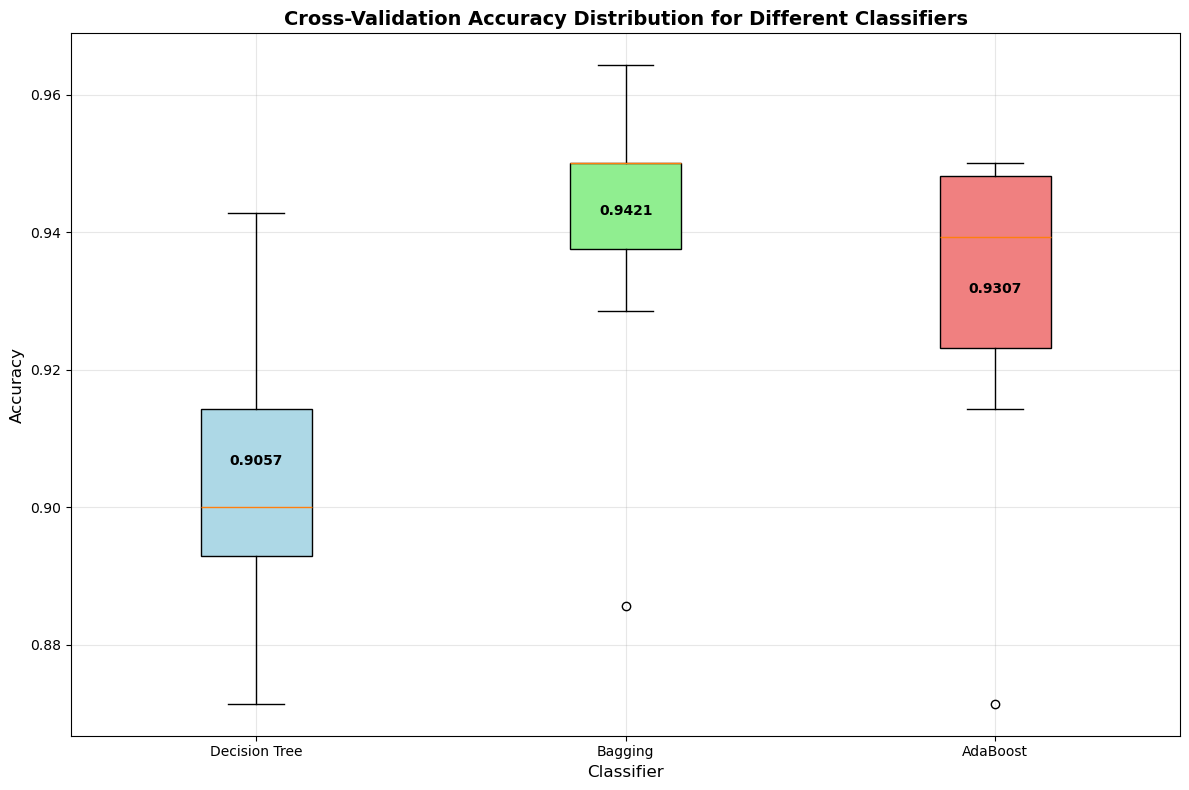

In [59]:
# Create visualizations
# Boxplot for cross-validation accuracies
plt.figure(figsize=(12, 8), dpi=100)

accuracy_data = [result['cv_accuracies'] for result in all_results]
classifier_names = [result['classifier_name'] for result in all_results]

box_plot = plt.boxplot(accuracy_data, tick_labels=classifier_names, patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Cross-Validation Accuracy Distribution for Different Classifiers',
          fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Classifier', fontsize=12)
plt.grid(True, alpha=0.3)

# Add mean accuracy values as text
for i, result in enumerate(all_results):
    plt.text(i + 1, result['accuracy_mean'], f'{result["accuracy_mean"]:.4f}',
             horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

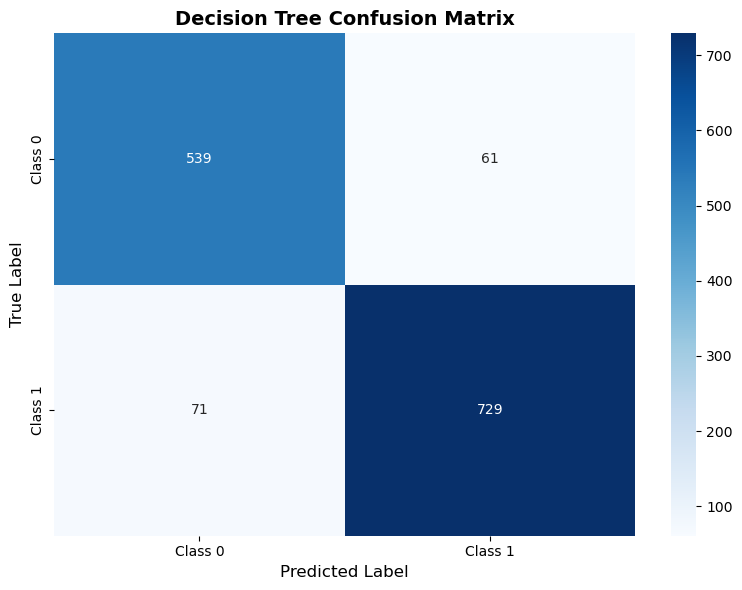

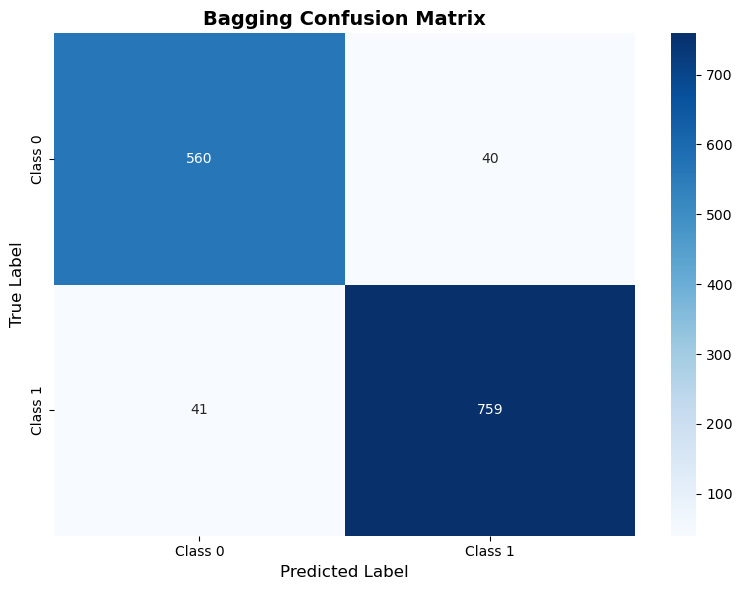

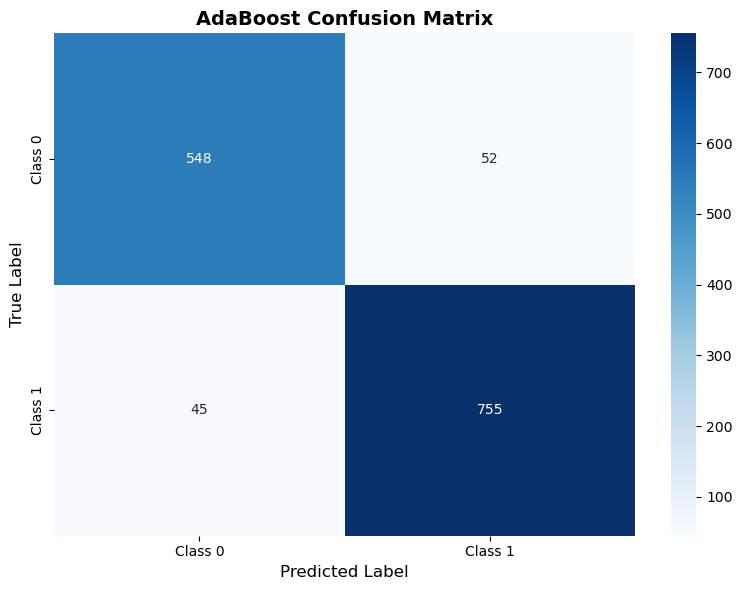

In [60]:
# Individual Confusion matrices
for i, result in enumerate(all_results):
    plt.figure(figsize=(8, 6), dpi=100)

    # Calculate confusion matrix
    cm = confusion_matrix(result['all_y_true'], result['all_y_pred'])

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])

    plt.title(f'{result["classifier_name"]} Confusion Matrix', fontweight='bold', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)

    plt.tight_layout()
    plt.show()

In [61]:
# Parameter sensitivity analysis
print('\nPerforming parameter sensitivity analysis...')

# Decision Tree max_depth sensitivity
dt_max_depths = [3, 5, 10, 15, 20, None]
dt_depth_scores = []

print('\nDecision Tree max_depth sensitivity:')
for depth in dt_max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(dt_temp, X, y, cv=cvKFold, scoring='accuracy')
    mean_score = scores.mean()
    dt_depth_scores.append(mean_score)
    print(f'max_depth={depth}: {mean_score:.4f}')


Performing parameter sensitivity analysis...

Decision Tree max_depth sensitivity:
max_depth=3: 0.9414
max_depth=5: 0.9293
max_depth=10: 0.9136
max_depth=15: 0.9057
max_depth=20: 0.9057
max_depth=None: 0.9057


In [62]:
# Bagging n_estimators sensitivity
bag_n_estimators_range = [10, 25, 50, 75, 100]
bag_estimator_scores = []

print('\nBagging n_estimators sensitivity:')
for n_est in bag_n_estimators_range:
    bag_temp = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=bag_max_depth, random_state=0),
        n_estimators=n_est,
        max_samples=bag_max_samples,
        random_state=0
    )
    scores = cross_val_score(bag_temp, X, y, cv=cvKFold, scoring='accuracy')
    mean_score = scores.mean()
    bag_estimator_scores.append(mean_score)
    print(f'n_estimators={n_est}: {mean_score:.4f}')


Bagging n_estimators sensitivity:
n_estimators=10: 0.9407
n_estimators=25: 0.9414
n_estimators=50: 0.9421
n_estimators=75: 0.9414
n_estimators=100: 0.9421


In [63]:
# AdaBoost learning_rate sensitivity
ada_learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
ada_lr_scores = []

print('\nAdaBoost learning_rate sensitivity:')
for lr in ada_learning_rates:
    ada_temp = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=ada_bag_max_depth, random_state=0),
        n_estimators=ada_n_estimators,
        learning_rate=lr,
        random_state=0,
        algorithm='SAMME'
    )
    scores = cross_val_score(ada_temp, X, y, cv=cvKFold, scoring='accuracy')
    mean_score = scores.mean()
    ada_lr_scores.append(mean_score)
    print(f'learning_rate={lr}: {mean_score:.4f}')


AdaBoost learning_rate sensitivity:
learning_rate=0.1: 0.9371
learning_rate=0.3: 0.9364
learning_rate=0.5: 0.9307
learning_rate=0.7: 0.9307
learning_rate=1.0: 0.9293


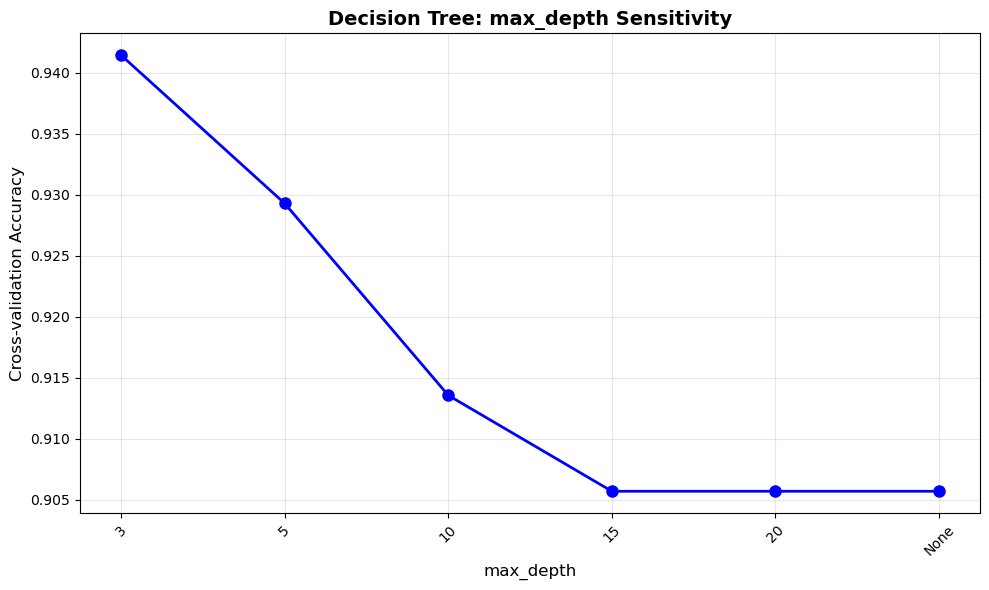

In [64]:
# Decision Tree max_depth sensitivity plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot([str(d) for d in dt_max_depths], dt_depth_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Decision Tree: max_depth Sensitivity', fontweight='bold', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Cross-validation Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

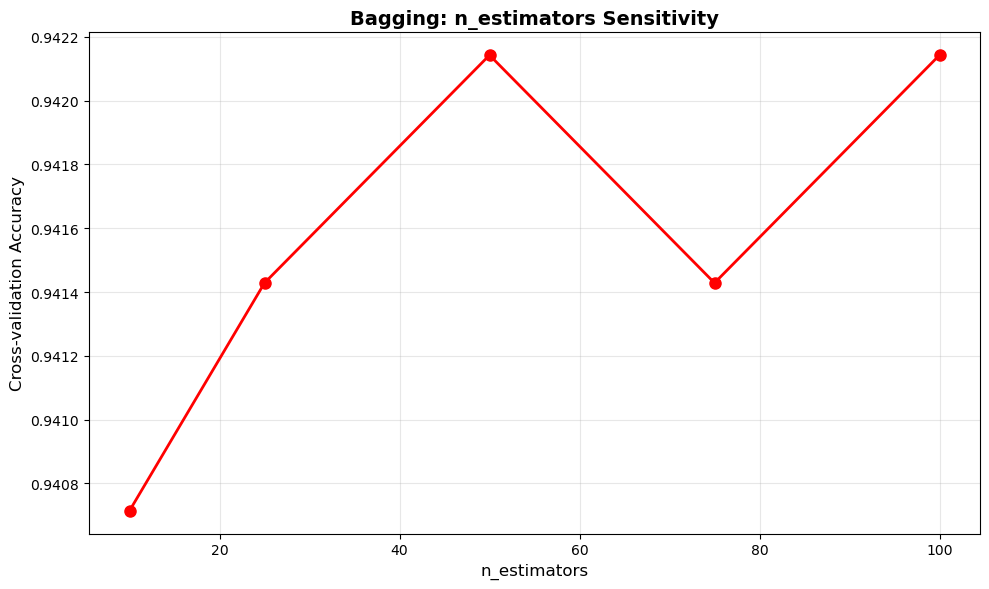

In [65]:
# Bagging n_estimators sensitivity plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(bag_n_estimators_range, bag_estimator_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Bagging: n_estimators Sensitivity', fontweight='bold', fontsize=14)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Cross-validation Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

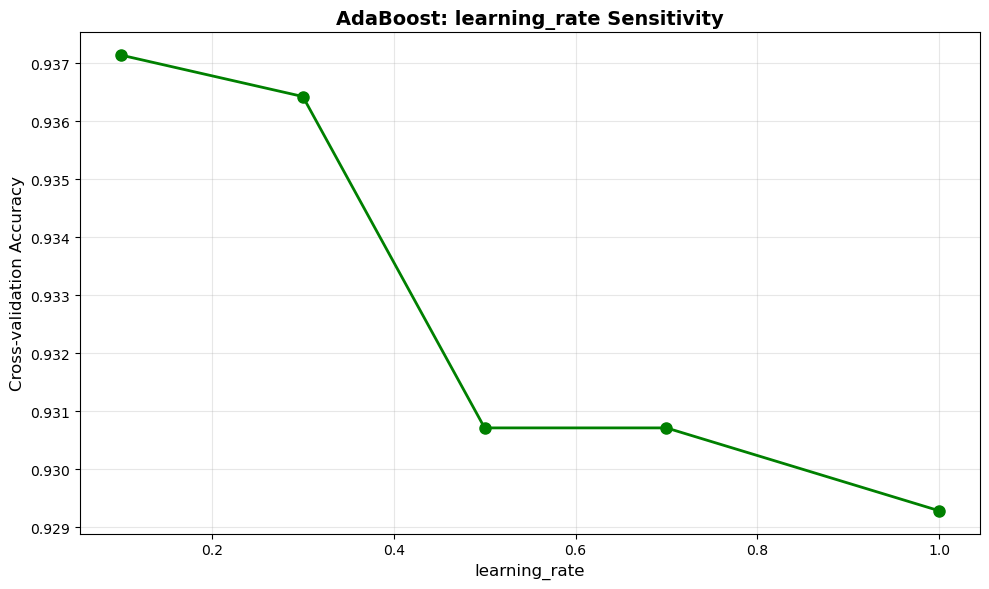

In [66]:
# AdaBoost learning_rate sensitivity plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(ada_learning_rates, ada_lr_scores, 'go-', linewidth=2, markersize=8)
plt.title('AdaBoost: learning_rate Sensitivity', fontweight='bold', fontsize=14)
plt.xlabel('learning_rate', fontsize=12)
plt.ylabel('Cross-validation Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Part 1 Results

In [ ]:
# Parameters for Part 1:

#Bagging
bag_n_estimators = 50
bag_max_samples = 100
bag_max_depth = 5

#AdaBoost
ada_n_estimators = 50
ada_learning_rate = 0.5
ada_bag_max_depth = 5

#GB
gb_n_estimators = 50
gb_learning_rate = 0.5

# Print results for each classifier in part 1 to 4 decimal places here:
print("LogR average cross-validation accuracy: ")
print("NB average cross-validation accuracy: ")
print("DT average cross-validation accuracy: ")
print("Bagging average cross-validation accuracy: ")
print("AdaBoost average cross-validation accuracy: ")
print("GB average cross-validation accuracy: ")

### Part 2: Cross-validation with parameter tuning

In [ ]:
# KNN
k = [1, 3, 5, 7]
p = [1, 2]


def bestKNNClassifier(X, y):
    
    return #(appropriate values so that the required printing can be done)

In [ ]:
# Random Forest
# You should use RandomForestClassifier from sklearn.ensemble with information gain and max_features set to ‘sqrt’.
n_estimators = [10, 30, 60, 100]
max_leaf_nodes = [6, 12]

def bestRFClassifier(X, y):

    return #(appropriate values so that the required printing can be done)

### Part 2: Results

In [ ]:
# Perform Grid Search with 10-fold stratified cross-validation (GridSearchCV in sklearn). 
# The stratified folds from cvKFold should be provided to GridSearchV

# This should include using train_test_split from sklearn.model_selection with stratification and random_state=0
# Print results for each classifier here. All results should be printed to 4 decimal places except for
# "k", "p", n_estimators" and "max_leaf_nodes" which should be printed as integers.
print("KNN best k: ")
print("KNN best p: ")
print("KNN cross-validation accuracy: ")
print("KNN test set accuracy: ")

print()

print("RF best n_estimators: ")
print("RF best max_leaf_nodes: ")
print("RF cross-validation accuracy: ")
print("RF test set accuracy: ")
print("RF test set macro average F1: ")
print("RF test set weighted average F1: ")